In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv("downloads/customer_booking.csv",encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [13]:
df=df.dropna()
df=pd.get_dummies(df,drop_first=True)

In [14]:
X=df.drop('booking_complete', axis=1)
y=df['booking_complete']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_model

RandomForestClassifier(random_state=42)

In [17]:
cv_scores=cross_val_score(rf_model,X,y,cv=5) 

In [18]:
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

Cross-validation scores: [0.8493 0.7794 0.7244 0.5358 0.7781]
Mean accuracy: 0.7334
Standard deviation: 0.1065


In [31]:
rf_model.fit(X, y)
importances=rf_model.feature_importances_
feature_names=np.array(X.columns)  

In [32]:
sorted_idx=np.argsort(importances)[::-1]
sorted_features=feature_names[sorted_idx]
sorted_importances=importances[sorted_idx]

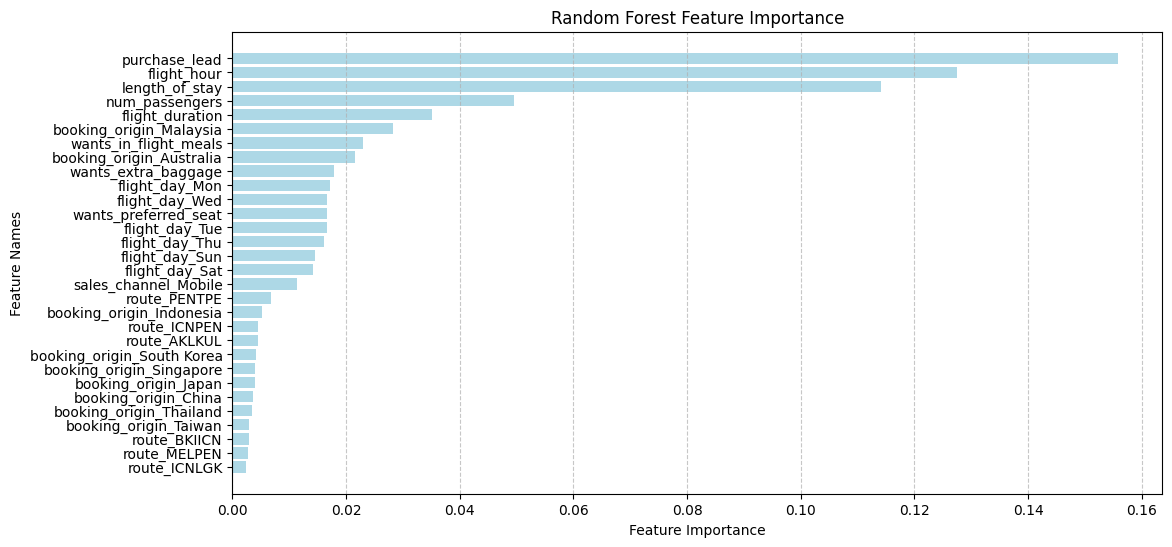

In [33]:
plt.figure(figsize=(12,6))
plt.barh(sorted_features[:30],sorted_importances[:30],color='lightblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.grid(axis='x',linestyle='--',alpha=0.7)
plt.show()